In [71]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [72]:
model = torch.load('../data_storage/CNN_L16_N100.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-0.0989, -0.2499, -0.2357,  0.0144],
                        [-0.0588,  0.1742, -0.0698,  0.0982],
                        [ 0.0606, -0.2591, -0.1993,  0.0177],
                        [-0.0588,  0.0697, -0.1059, -0.2593]]],
              
              
                      [[[ 0.1992,  0.2063,  0.2431,  0.2063],
                        [-0.2948, -0.0204, -0.1922,  0.0192],
                        [-0.1683,  0.0491, -0.2150, -0.1518],
                        [ 0.2745,  0.2172, -0.1832, -0.0177]]],
              
              
                      [[[ 0.1407,  0.2782,  0.3005, -0.2132],
                        [-0.0379,  0.0332,  0.3505, -0.0523],
                        [ 0.2711, -0.1609,  0.1990,  0.0883],
                        [-0.0781, -0.0176, -0.0922,  0.2134]]],
              
              
                      [[[ 0.0708, -0.0805, -0.0174, -0.1194],
                        [ 0.0092, -0.1636,  0.1391,  0.1055],
     

In [73]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-0.0989, -0.2499, -0.2357,  0.0144],
          [-0.0588,  0.1742, -0.0698,  0.0982],
          [ 0.0606, -0.2591, -0.1993,  0.0177],
          [-0.0588,  0.0697, -0.1059, -0.2593]]],


        [[[ 0.1992,  0.2063,  0.2431,  0.2063],
          [-0.2948, -0.0204, -0.1922,  0.0192],
          [-0.1683,  0.0491, -0.2150, -0.1518],
          [ 0.2745,  0.2172, -0.1832, -0.0177]]],


        [[[ 0.1407,  0.2782,  0.3005, -0.2132],
          [-0.0379,  0.0332,  0.3505, -0.0523],
          [ 0.2711, -0.1609,  0.1990,  0.0883],
          [-0.0781, -0.0176, -0.0922,  0.2134]]],


        [[[ 0.0708, -0.0805, -0.0174, -0.1194],
          [ 0.0092, -0.1636,  0.1391,  0.1055],
          [-0.0381,  0.2535, -0.1210, -0.0009],
          [ 0.3573, -0.0203,  0.0822,  0.3276]]],


        [[[-0.0606,  0.0059,  0.3558,  0.1918],
          [ 0.0961,  0.0303,  0.2724, -0.0445],
          [ 0.3060, -0.0232,  0.3882, -0.1605],
          [-0.1894,  0.2517, -0.0914,  0.0754]]]], device='cuda:0')

In [74]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.cpu().numpy()

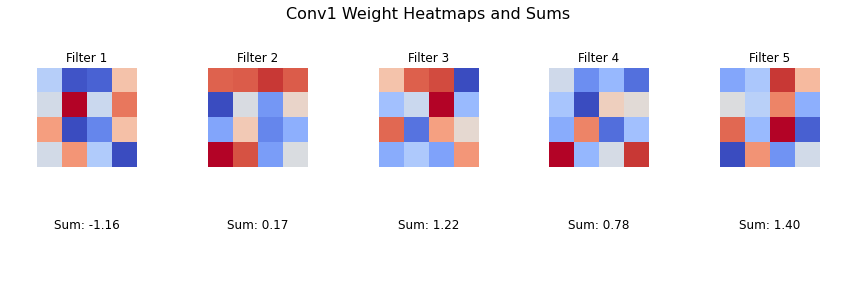

In [75]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [76]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[ 0.0071,  0.0432, -0.0295,  ..., -0.0945, -0.0046,  0.0079],
        [ 0.0426, -0.1233, -0.1226,  ...,  0.0054, -0.0032, -0.0661],
        [ 0.0182, -0.0409, -0.0206,  ..., -0.0558,  0.0751,  0.0608],
        ...,
        [-0.0337,  0.0987, -0.0882,  ..., -0.1364, -0.2279, -0.2353],
        [ 0.0737,  0.0715,  0.0746,  ..., -0.1253, -0.0711, -0.0389],
        [ 0.0545, -0.0524, -0.1181,  ..., -0.2533, -0.2211, -0.1726]],
       device='cuda:0')

In [77]:
fc_weight.size()

torch.Size([100, 80])

In [78]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [79]:
fc_weight_np_square

array([[ 0.00714341,  0.04263407,  0.01820251, ..., -0.03369166,
         0.07370211,  0.05447489],
       [ 0.04322316, -0.12329838, -0.0409213 , ...,  0.09867677,
         0.07152369, -0.05240341],
       [-0.02949178, -0.1226129 , -0.02064904, ..., -0.08821929,
         0.07456815, -0.11812437],
       ...,
       [-0.0944708 ,  0.00536697, -0.05575916, ..., -0.13641685,
        -0.12531883, -0.2533126 ],
       [-0.00462239, -0.00321009,  0.07507698, ..., -0.22791235,
        -0.07108109, -0.22109969],
       [ 0.00788979, -0.06606084,  0.06078291, ..., -0.23528348,
        -0.03894555, -0.17256404]], dtype=float32)

In [80]:
fc_weight_np_square.shape

(80, 100)

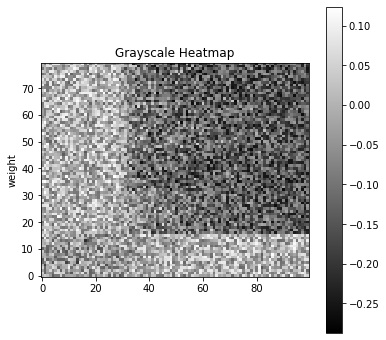

In [81]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [82]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -0.6161336 ,  -0.524215  ,  -0.56056   ,  -1.3821635 ,
        -0.770826  ,  -0.5861068 ,  -0.20310682,  -0.30407843,
        -1.0853727 ,  -0.987777  ,  -0.67050314,  -0.65346736,
        -0.5902779 ,  -1.2384877 ,   0.07617982,  -0.21141881,
        -2.1094217 ,  -1.345577  ,  -1.8655702 ,  -0.5120789 ,
         0.11833364,  -1.4149526 ,  -0.63398176,   0.7528975 ,
        -1.1182787 ,  -0.8410876 ,  -0.9773397 ,  -0.09927052,
        -0.49966955,  -1.5668361 ,  -1.8626287 ,  -1.9205761 ,
        -4.9065933 ,  -4.753127  ,  -4.5507774 ,  -5.7719445 ,
        -6.243713  ,  -6.2662654 ,  -6.13807   ,  -7.043626  ,
        -6.8571587 ,  -7.137494  ,  -5.6471434 ,  -7.8170357 ,
        -7.148281  ,  -7.0109816 ,  -7.0598645 ,  -7.4592257 ,
        -6.4133224 ,  -8.53606   ,  -8.084889  ,  -7.115716  ,
        -7.964792  ,  -7.845707  ,  -9.012627  ,  -8.461364  ,
        -8.490756  ,  -8.420827  ,  -8.235478  ,  -8.347535  ,
        -8.1656    ,  -8.335192  ,  -7.499509  ,  -8.94

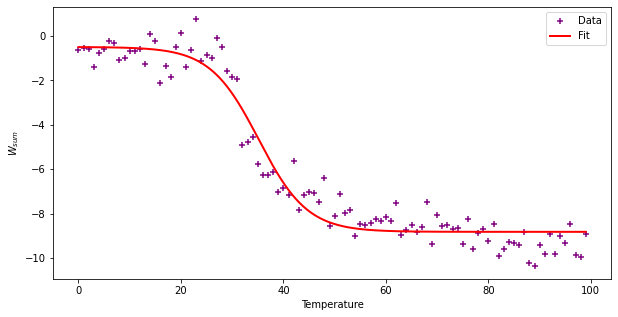

Fitted Parameters:
a: -4.162965388687276
b: 0.10542710285674362
c: -3.707269877966819
d: -4.653717923571371


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.xlabel('Temperature')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [84]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 35.1642962531592
beta: 0.48415592931845886
